#Example texts

In [4]:
text = """In 2022, we recognized total revenues of $81.46 billion, respectively, representing an increase of $27.64 billion, compared to the prior year.
We continue to ramp production, build new manufacturing capacity and expand our operations to enable increased deliveries and deployments of our products and further revenue growth."""

text_2 = """Energy Generation and Storage Segment
Energy generation and storage revenue includes sales and leasing of solar energy generation and energy storage products,
financing of solar energy generation products, services related to such products and sales of solar energy systems incentives.
2022 compared to 2021
Energy generation and storage revenue increased $1.12 billion, or 40%, in the year ended December 31, 2022 as compared to the
year ended December 31, 2021, primarily due to an increase in energy storage deployments of Megapack, Powerwall and higher
average selling price of Megapack, as well as on solar cash and loan deployments driven by price increases in 2022."""


table = """Production Location Vehicle Model(s) Production Status
Fremont Factory Model S / Model X Active
Model 3 / Model Y Active
Gigafactory Shanghai Model 3 / Model Y Active
Gigafactory Berlin-Brandenburg Model Y Active
Gigafactory Texas Model Y Active
Cybertruck Tooling
Gigafactory Nevada Tesla Semi Pilot production
TBD Tesla Roadster In development
TBD Robotaxi & Others In development"""

table_2 = """Cost of Revenues and Gross Margin
Year Ended December 31, 2022 vs. 2021 Change 2021 vs. 2020 Change
(Dollars in millions) 2022 2021 2020 $ % $ %
Cost of revenues
Automotive sales $ 49,599 $ 32,415 $ 19,696 $ 17,184 53 % $ 12,719 65 %
Automotive leasing 1,509 978 563 531 54 % 415 74 %
Total automotive cost of revenues 51,108 33,393 20,259 17,715 53 % 13,134 65 %
Services and other 5,880 3,906 2,671 1,974 51 % 1,235 46 %
Total automotive & services and other
segment cost of revenues 56,988 37,299 22,930 19,689 53 % 14,369 63 %
Energy generation and storage segment 3,621 2,918 1,976 703 24 % 942 48 %
Total cost of revenues $ 60,609 $ 40,217 $ 24,906 $ 20,392 51 % $ 15,311 61 %
Gross profit total automotive $ 20,354 $ 13,839 $ 6,977
Gross margin total automotive 28.5 % 29.3 % 25.6 %
Gross profit total automotive & services and other
segment $ 20,565 $ 13,735 $ 6,612
Gross margin total automotive & services and other
segment 26.5 % 26.9 % 22.4 %
Gross profit energy generation and storage segment $ 288 $ (129 ) $ 18
Gross margin energy generation and storage segment 7.4 % (4.6 )% 0.9 %
Total gross profit $ 20,853 $ 13,606 $ 6,630
Total gross margin 25.6 % 25.3 % 21.0 %"""


neutral_text = """Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies
                  working in computer technologies and telecommunications , the statement said """

neutral_text_2 = """In Sweden , Gallerix accumulated SEK denominated sales were down 1 % and EUR denominated sales were up 11 % . """

neutral_text_3 = """ When this investment is in place , Atria plans to expand into the Moscow market """


negative_text = """ You should carefully consider the risks described below together with the other information set forth in this report, which could
materially affect our business, financial condition and future results. The risks described below are not the only risks facing our
company. Risks and uncertainties not currently known to us or that we currently deem to be immaterial also may materially adversely
affect our business, financial condition and operating results. """


very_negative_text = """ On the other hand , Finnish sawmills ' production has decreased even more. """

very_negative_text_2 = "Additionally, the company will terminate a maximum nine salaried and senior salaried employees' employment contracts."

# FinBERT

In [5]:
!pip install -q transformers

In [6]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",
             "growth is strong and we have plenty of liquidity",
             "there are doubts about our finances",
             "profits are flat"]
results = nlp(sentences)
print(results)

[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889441728591919}]


In [ ]:
# Using pipeline class to make predictions from models available in the Hub
from transformers import pipeline

pipe_Prosus = pipeline("text-classification", model="ProsusAI/finbert")       #LABEL_0: positive; LABEL_1: negative; LABEL_2: neutral
pipe_yiy = pipeline("text-classification", model="yiyanghkust/finbert-tone")  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative  ## Be careful!

(positive) text with table

In [8]:
print( pipe_Prosus([text, text + table]) )
print( pipe_yiy([text, text + table]) )

[{'label': 'positive', 'score': 0.9521226286888123}, {'label': 'positive', 'score': 0.8529262542724609}]
[{'label': 'Positive', 'score': 0.9999998807907104}, {'label': 'Positive', 'score': 0.9999986886978149}]


In [9]:
# reverse order: table and text
print( pipe_Prosus([text, table + text]) )
print( pipe_yiy([text, table + text]) )

[{'label': 'positive', 'score': 0.9521226286888123}, {'label': 'positive', 'score': 0.947961151599884}]
[{'label': 'Positive', 'score': 0.9999998807907104}, {'label': 'Positive', 'score': 0.9999994039535522}]


In [10]:
print( pipe_Prosus([text, text + table_2]) )
print( pipe_yiy([text, text + table_2]) )

[{'label': 'positive', 'score': 0.9521226286888123}, {'label': 'neutral', 'score': 0.6441490650177002}]
[{'label': 'Positive', 'score': 0.9999998807907104}, {'label': 'Positive', 'score': 0.896435558795929}]


(positive) text_2 with table

In [11]:
print( pipe_Prosus([text_2, text_2 + table]) )
print( pipe_yiy([text_2, text_2 + table]) )

[{'label': 'positive', 'score': 0.9554265737533569}, {'label': 'positive', 'score': 0.9512686133384705}]
[{'label': 'Positive', 'score': 0.9983287453651428}, {'label': 'Positive', 'score': 0.9982409477233887}]


In [12]:
print( pipe_Prosus([text_2, text_2 + table_2]) )
print( pipe_yiy([text_2, text_2 + table_2]) )

[{'label': 'positive', 'score': 0.9554265737533569}, {'label': 'positive', 'score': 0.592644453048706}]
[{'label': 'Positive', 'score': 0.9983287453651428}, {'label': 'Neutral', 'score': 0.934296190738678}]


Conclusion: appending a **table** (that is copy pasted) could influence the results significantly

Also note that *yiyanghkust/finbert-tone* was trained on Corporate Reports 10-K & 10-Q

# FinVADER

In [ ]:
!pip install finvader

In [19]:
from finvader import finvader

print( finvader(text, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

print( finvader(text + table, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

print( finvader(text + table_2, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

0.8911
0.8573
0.8649


In [15]:
print( finvader(text_2, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

print( finvader(text_2 + table, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

print( finvader(text_2 + table_2, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

0.9171
0.9225
0.9257


Conclusion: FinVADER is less sensitive to **tables**



#Long texts?

In [16]:
long_text = """ITEM 1. BUSINESS
Overview
We design, develop, manufacture, sell and lease high-performance fully electric vehicles and energy generation and storage
systems, and offer services related to our products. We generally sell our products directly to customers, and continue to grow our
customer-facing infrastructure through a global network of vehicle service centers, Mobile Service, body shops, Supercharger stations
and Destination Chargers to accelerate the widespread adoption of our products. We emphasize performance, attractive styling and the
safety of our users and workforce in the design and manufacture of our products and are continuing to develop full self-driving
technology for improved safety. We also strive to lower the cost of ownership for our customers through continuous efforts to reduce
manufacturing costs and by offering financial and other services tailored to our products.
Our mission is to accelerate the world’s transition to sustainable energy. We believe that this mission, along with our engineering
expertise, vertically integrated business model and focus on user experience differentiate us from other companies.
Segment Information
We operate as two reportable segments: (i) automotive and (ii) energy generation and storage.
The automotive segment includes the design, development, manufacturing, sales and leasing of high-performance fully electric
vehicles as well as sales of automotive regulatory credits. Additionally, the automotive segment also includes services and other, which
includes non-warranty after-sales vehicle services and parts, sales of used vehicles, retail merchandise, paid Supercharging and vehicle
insurance revenue. The energy generation and storage segment includes the design, manufacture, installation, sales and leasing of solar
energy generation and energy storage products and related services and sales of solar energy systems incentives.
Our Products and Services
Automotive
We currently manufacture four different consumer vehicles – the Model 3, Y, S and X. Model 3 is a four-door mid-size sedan that
we designed for manufacturability with a base price for mass-market appeal. Model Y is a compact sport utility vehicle (“SUV”) built
on the Model 3 platform with seating for up to seven adults. Model S is a four-door full-size sedan and Model X is a mid-size SUV
with seating for up to seven adults. Model S and Model X feature the highest performance characteristics and longest ranges that we
offer in a sedan and SUV, respectively.
In December 2022, we began early production and deliveries of the Tesla Semi, our first commercial electric vehicle. We have
also announced several planned electric vehicles to address additional vehicle markets, including specialized consumer electric vehicles
in Cybertruck and the new Tesla Roadster. We plan to continue leveraging developments in our proprietary Full Self-Driving (“FSD”),
battery cell and other technologies.
Energy Generation and Storage
Energy Storage Products
Powerwall and Megapack are our lithium-ion battery energy storage products. Powerwall is designed to store energy at a home or
small commercial facility. Megapack is an energy storage solution for commercial, industrial, utility and energy generation customers,
multiple of which may be grouped together to form larger installations of gigawatt hours (“GWh”) or greater capacity.
We also continue to develop software capabilities for remotely controlling and dispatching our energy storage systems across a
wide range of markets and applications, including through our real-time energy control and optimization platforms.
Solar Energy Offerings
We sell retrofit solar energy systems to customers and channel partners and also make them available through power purchase
agreement (“PPA”) arrangements. We purchase most of the components for our retrofit solar energy systems from multiple sources to
ensure competitive pricing and adequate supply. We also design and manufacture certain components for our solar energy products.
We sell our Solar Roof, which combines premium glass roof tiles with energy generation, directly to customers, as well as
through channel customers. We continue to improve our installation capability and efficiency, including through collaboration with real
estate developers and builders on new homes.
4

Technology
Automotive
Battery and Powertrain
Our core vehicle technology competencies include powertrain engineering and manufacturing and our ability to design vehicles
that utilize the unique advantages of an electric powertrain. We have designed our proprietary powertrain systems to be adaptable,
efficient, reliable and cost-effective while withstanding the rigors of an automotive environment. We offer dual motor powertrain
vehicles, which use two electric motors to maximize traction and performance in an all-wheel drive configuration, as well as vehicle
powertrain technology featuring three electric motors for further increased performance in certain versions of Model S and Model X
and the Tesla Semi.
We maintain extensive testing and R&D capabilities for battery cells, packs and systems, and have built an expansive body of
knowledge on lithium-ion cell chemistry types and performance characteristics. In order to enable a greater supply of cells for our
products with higher energy density at lower costs, we have developed a new proprietary lithium-ion battery cell and improved
manufacturing processes.
Vehicle Control and Infotainment Software
The performance and safety systems of our vehicles and their battery packs utilize sophisticated control software. Control
systems in our vehicles optimize performance, customize vehicle behavior, manage charging and control all infotainment functions. We
develop almost all of this software, including most of the user interfaces, internally and update our vehicles’ software regularly through
over-the-air updates.
Self-Driving Development and Artificial Intelligence
We have expertise in developing technologies, systems and software to enable self-driving vehicles using primarily vision-based
technologies. Our FSD Computer runs our neural networks in our vehicles, and we are also developing additional computer hardware to
better enable the massive amounts of field data captured by our vehicles to continually train and improve these neural networks for realworld performance.
Currently, we offer in our vehicles certain advanced driver assist systems under our Autopilot and FSD options. Although at
present the driver is ultimately responsible for controlling the vehicle, our systems provide safety and convenience functionality that
relieves drivers of the most tedious and potentially dangerous aspects of road travel much like the system that airplane pilots use, when
conditions permit. As with other vehicle systems, we improve these functions in our vehicles over time through over-the-air updates.
We intend to establish in the future an autonomous Tesla ride-hailing network, which we expect would also allow us to access a
new customer base even as modes of transportation evolve.
We are also applying our artificial intelligence learnings from self-driving technology to the field of robotics. For example, in
2022 we previewed Optimus, a robotic humanoid which is controlled by the same AI system.
Energy Generation and Storage
Energy Storage Products
We leverage many of the component-level technologies from our vehicles in our energy storage products. By taking a modular
approach to the design of battery systems, we can optimize manufacturing capacity of our energy storage products. Additionally, our
expertise in power electronics enables our battery systems to interconnect with electricity grids while providing fast-acting systems for
power injection and absorption. We have also developed software to remotely control and dispatch our energy storage systems.
Solar Energy Systems
We have engineered Solar Roof over numerous iterations to combine aesthetic appeal and durability with power generation. The
efficiency of our solar energy products is aided by our own solar inverter, which incorporates our power electronics technologies. We
designed both products to integrate with Powerwall."""

In [20]:
pipe_yiy(long_text)

RuntimeError: The size of tensor a (1442) must match the size of tensor b (512) at non-singleton dimension 1

In [21]:
finvader(long_text, use_sentibignomics = True, use_henry = True, indicator = 'compound')

0.9966

In [22]:
file = open("10-K 20230131.txt", "r")
very_long_text = file.read()
file.close()

len(very_long_text)

370428

In [23]:
finvader(very_long_text, use_sentibignomics = True, use_henry = True, indicator = 'compound')

1.0

#Negative scores?

In [24]:
finvader(negative_text, use_sentibignomics = True, use_henry = True, indicator = 'compound')

-0.9311

In [25]:
print(pipe_Prosus(negative_text))
print(pipe_yiy(negative_text))

[{'label': 'neutral', 'score': 0.5215967893600464}]
[{'label': 'Negative', 'score': 0.7770941257476807}]


#How to compare finVADER and finBERT scores?

In [28]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

#model_name = "ProsusAI/finbert"
model_name = "yiyanghkust/finbert-tone"
model_finbert = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer_finbert = AutoTokenizer.from_pretrained(model_name)

def output_probabilities(text):
  global tokenizer_finbert
  global model_finbert
  inputs = tokenizer_finbert(text, return_tensors="pt")
  outputs = model_finbert(**inputs)
  return torch.nn.functional.softmax(outputs.logits, dim=-1)

def convert_finbert_to_vader(text):
  distribution = output_probabilities(text)
  return float(distribution[0][1]-distribution[0][2])

In [29]:
def get_vader_score(text):
  return finvader(text, use_sentibignomics = True, use_henry = True, indicator = 'compound')

In [33]:
convert_finbert_to_vader(text)

0.9999998807907104

In [31]:
get_vader_score(text)

0.8911

#GPT

In [ ]:
!pip install --upgrade openai

In [35]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(api_key=userdata.get('gpt-key'))

stream = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": "Say this is a test"}],
    stream=True,
)
for chunk in stream:
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="")

This is a test.

Starting with a simple prompt:

In [36]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(api_key=userdata.get('gpt-key'))

prompt = 'Classify the financial sentiment of the following text enclosed within the angle brackets. Reply only with a score between -1 and 1. '

def llm_score(text, model):
  stream = client.chat.completions.create(
      model=model,
      messages=[{"role": "user", "content": prompt + '<' + text + '>'}],
      stream=True,
  )
  for chunk in stream:
      if chunk.choices[0].delta.content is not None:
          print(chunk.choices[0].delta.content, end="")

In [37]:
# default value of temperature is 1
for x in range(6):
  llm_score(text, "gpt-3.5-turbo")
  print('\t')

1	
1	
0.8	
0.8	
0.8	
0.8	


Using a more sophisticated prompt:

In [38]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(api_key=userdata.get('gpt-key'))

def llm_score(text, model, temp, rep):
  completion = client.chat.completions.create(
      model=model,
      temperature = temp,
      n = rep,
      messages=[
        {"role": "system", "content": """You are a financial expert. Your task is to classify the financial sentiment of a given input text.
                                      For a given input, you need to output a single number only which is a sentiment score between -1 and 1."""},
        {"role": "user",  "content": """Classify the financial sentiment of the following text enclosed within angle brackets.
                                      Reply only with a score between -1 and 1. <""" + text + ">"}
      ]
    )

  sample = []
  for i in range(rep):
    score = completion.choices[i].message.content.rstrip(".")
    if len(score) < 5:
       sample.append(float(score))

  return sample

In [39]:
text_pos = "Adjusted for changes in the Group structure , the Division 's net sales increased by 1.7 % ."

#text_neu = "A maximum of 666,104 new shares can further be subscribed for by exercising B options under the 2004 stock option plan ."
text_neu = "Aviation Systems Maintenance is based in Kansas and generated net sales of USD 2.6 million for 2008 ."

text_neg = "As a result of the negotiations the employment of 130 blue - and white-collar employees at the Oulu plant would be terminated ."
#text_neg = "On the other hand , Finnish sawmills ' production has decreased even more."

In [40]:
print( finvader(text_pos, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

print( finvader(text_neu, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

print( finvader(text_neg, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

0.3716
0.0258
0.0245


Zero temperature is deterministic

In [41]:
import statistics

n = 100
T = 0
sample = llm_score(text_pos, "gpt-3.5-turbo", T, n)

print("Average of sample is", (statistics.mean(sample)))
print("Standard Deviation of sample is", (statistics.stdev(sample)))

Average of sample is 0.8
Standard Deviation of sample is 0.0


Finite temperature introduces some "fluctuations"



In [42]:
T = 0.5
sample = llm_score(text_pos, "gpt-3.5-turbo", T, n)

print("Average of sample is", (statistics.mean(sample)))
print("Standard Deviation of sample is", (statistics.stdev(sample)))

Average of sample is 0.794
Standard Deviation of sample is 0.02386832565759422


Be careful! **Sometimes the output is** not just a single score, but **a short text**, e.g.

> The given text conveys positive financial sentiment. The company experienced a significant increase in total revenues in 2022 compared to the prior year. Additionally, it mentions ramping up production, building new manufacturing capacity, and expanding operations to enable further revenue growth. Therefore, the sentiment score is 0.8, indicating a positive financial outlook.



##Testing *gpt-3.5-turbo*



In [43]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

n = 128
temp_list = [0, 0.5, 1, 1.5]
model = "gpt-3.5-turbo"

score_avg = []
score_stdev = []
for T in temp_list:
  sample = llm_score(text_pos, model, T, n)
  score_avg.append(statistics.mean(sample))
  score_stdev.append(statistics.stdev(sample))

In [44]:
score_avg_neu = []
score_stdev_neu = []
for T in temp_list:
  sample = llm_score(text_neu, model, T, n)
  score_avg_neu.append(statistics.mean(sample))
  score_stdev_neu.append(statistics.stdev(sample))

In [45]:
score_avg_neg = []
score_stdev_neg = []
for T in temp_list:
  sample = llm_score(text_neg, model, T, n)
  score_avg_neg.append(statistics.mean(sample))
  score_stdev_neg.append(statistics.stdev(sample))

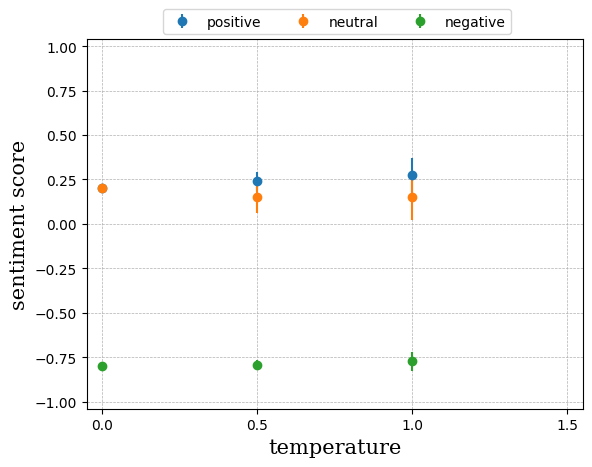

In [65]:
fig = plt.figure()
plt.errorbar(temp_list, score_avg, yerr=score_stdev, label='positive', marker='o', linestyle='')
plt.errorbar(temp_list, score_avg_neu, yerr=score_stdev_neu, label='neutral', marker='o', linestyle='')
plt.errorbar(temp_list, score_avg_neg, yerr=score_stdev_neg, label='negative', marker='o', linestyle='')

font = {'family':'serif','size':15}
#plt.title("")
plt.xlabel('temperature', fontdict = font)
plt.ylabel('sentiment score', fontdict = font)
plt.xlim(-0.05, 1.55)
plt.ylim(-1.04, 1.04)
plt.xticks(np.arange(0, 1.75, step=0.5))
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(bbox_to_anchor =(0.87, 1.1), ncol = 3)
plt.show()

##Testing *gpt-4-turbo*

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

n = 128
temp_list = [0, 0.5, 1, 1.5]
model = "gpt-4-turbo"

score_avg = []
score_stdev = []
for T in temp_list:
  sample = llm_score(text_pos, model, T, n)
  score_avg.append(statistics.mean(sample))
  score_stdev.append(statistics.stdev(sample))

In [71]:
score_avg_neu = []
score_stdev_neu = []
for T in temp_list:
  sample = llm_score(text_neu, model, T, n)
  score_avg_neu.append(statistics.mean(sample))
  score_stdev_neu.append(statistics.stdev(sample))

In [72]:
score_avg_neg = []
score_stdev_neg = []
for T in temp_list:
  sample = llm_score(text_neg, model, T, n)
  score_avg_neg.append(statistics.mean(sample))
  score_stdev_neg.append(statistics.stdev(sample))

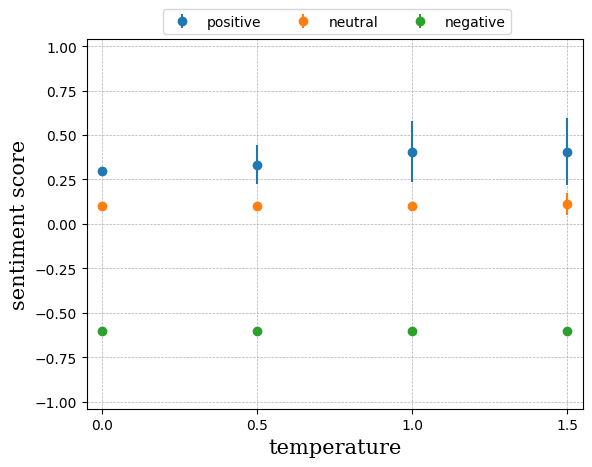

In [73]:
fig = plt.figure()
plt.errorbar(temp_list, score_avg, yerr=score_stdev, label='positive', marker='o', linestyle='')
plt.errorbar(temp_list, score_avg_neu, yerr=score_stdev_neu, label='neutral', marker='o', linestyle='')
plt.errorbar(temp_list, score_avg_neg, yerr=score_stdev_neg, label='negative', marker='o', linestyle='')

font = {'family':'serif','size':15}
#plt.title(model)
plt.xlabel('temperature', fontdict = font)
plt.ylabel('sentiment score', fontdict = font)
plt.xlim(-0.05, 1.55)
plt.ylim(-1.04, 1.04)
plt.xticks(np.arange(0, 1.75, step=0.5))
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(bbox_to_anchor =(0.87, 1.1), ncol = 3)
plt.show()

##Testing *gpt-4o*

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

n = 128
#temp_list = [0, 0.5, 1, 1.5]
temp_list = [0, 0.5, 1]
model = "gpt-4o"

score_avg = []
score_stdev = []
for T in temp_list:
  sample = llm_score(text_pos, model, T, n)
  score_avg.append(statistics.mean(sample))
  score_stdev.append(statistics.stdev(sample))

In [79]:
score_avg_neu = []
score_stdev_neu = []
for T in temp_list:
  sample = llm_score(text_neu, model, T, n)
  score_avg_neu.append(statistics.mean(sample))
  score_stdev_neu.append(statistics.stdev(sample))

In [80]:
score_avg_neg = []
score_stdev_neg = []
for T in temp_list:
  sample = llm_score(text_neg, model, T, n)
  score_avg_neg.append(statistics.mean(sample))
  score_stdev_neg.append(statistics.stdev(sample))

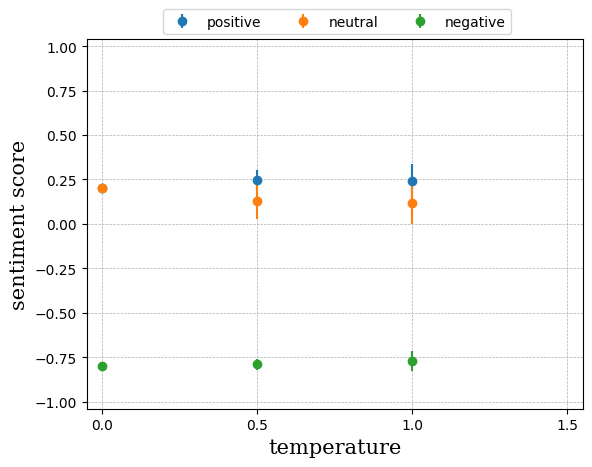

In [81]:
fig = plt.figure()
plt.errorbar(temp_list, score_avg, yerr=score_stdev, label='positive', marker='o', linestyle='')
plt.errorbar(temp_list, score_avg_neu, yerr=score_stdev_neu, label='neutral', marker='o', linestyle='')
plt.errorbar(temp_list, score_avg_neg, yerr=score_stdev_neg, label='negative', marker='o', linestyle='')

font = {'family':'serif','size':15}
#plt.title(model)
plt.xlabel('temperature', fontdict = font)
plt.ylabel('sentiment score', fontdict = font)
plt.xlim(-0.05, 1.55)
plt.ylim(-1.04, 1.04)
plt.xticks(np.arange(0, 1.75, step=0.5))
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(bbox_to_anchor =(0.87, 1.1), ncol = 3)
plt.show()

**Using list of sentences** as the input

In [82]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(api_key=userdata.get('gpt-key'))

def llm_score_for_list(text_list, model, temp):
  completion = client.chat.completions.create(
      model=model,
      temperature = temp,
      n = 1,
      messages=[
        {"role": "system", "content": """You are a financial expert. Your task is to classify the financial sentiment of a given input text.
                                        For a given input, you need to output a single number only which is a sentiment score between -1 and 1.
                                        -1 corresponds to completely negative sentiment, +1 corresponds to completely positive sentiment."""},
        {"role": "user",  "content": f"""Classify the financial sentiment of the following sentences included in a list.
                                      Give a score between -1 and 1 for each element of the list. Output only the scores as a list!
                                      {text_list}"""}
      ]
    )

  return completion

In [83]:
text_list = ["To the extent that countries do not enforce Abbott’s intellectual property rights, Abbott’s future revenues and operating income could be reduced.",
             "For example, Abbott may be required to provide additional warnings on a product’s label or narrow its approved intended use, either of which could reduce the product’s market acceptance.",
             "If serious safety concerns arise with an Abbott product, sales of the product have been and could be halted by Abbott or by regulatory authorities.",
             "Dividends paid totaled $3.309 billion in 2022 compared to $3.202 billion in 2021.",
             "Abbott declared dividends of $1.92 per share in 2022 and $1.82 per share in 2021, an increase of approximately 5.5 percent."]

T=0
model="gpt-4o"
print(llm_score_for_list(text_list, model, T).choices[0].message.content)

[-0.8, -0.6, -0.9, 0.2, 0.7]


In [84]:
for s in text_list:
  print(llm_score(s, model, T, 1))

[-0.5]
[-0.5]
[-0.8]
[0.1]
[0.5]


In [85]:
import json
with open('./combined_labeled_sentences.json', 'r', encoding='utf-8') as f:
    sentences_dictionary = json.load(f)

In [86]:
tsla22_relevant = []

for s in sentences_dictionary["tsla22_sentences.json"]:
  if s[1]==1:
    tsla22_relevant.append(s[0])

print(len(tsla22_relevant))

439


In [88]:
dim = 5
offset = 339
text_list = tsla22_relevant[offset:(offset+dim)]

T=0
model="gpt-4o"
print(llm_score_for_list(text_list, model, T).choices[0].message.content)


dim = 10
text_list = tsla22_relevant[offset:(offset+dim)]
print(llm_score_for_list(text_list, model, T).choices[0].message.content)

[-0.5, 0.5, -0.2, 0, 0.1]
[-0.5, 0.5, -0.2, 0, 0.2, 0.3, 0.6, 0.4, 0.3, 0.7]


In [90]:
# comparison with finVADER
for s in text_list:
  print( finvader(s, use_sentibignomics = True, use_henry = True, indicator = 'compound') )

-0.3436
-0.128
0.3226
0.3182
0.1618
0.0323
0.3612
0.3474
0.0116
0.7484


Conclusion: using a list of 5 to 10 sentences works well

Scoring a full 10k report with a single evaluation is not advisable.

In [62]:
text_list = tsla22_relevant

T=0
model="gpt-4o"
print(llm_score_for_list(text_list, model, T).choices[0].message.content)

[-0.1, 0.1, -0.5, 0.3, 0.4, 0.5, 0.5, 0.4, 0.4, 0.4, -0.3, 0.3, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, -0.4, -0.4, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, -0.6, -0.6, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -